In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

### Implementing the Gradient Descent Algorithm

In [56]:
#Importing Datasets

df = pd.read_csv('iris_small.csv')

In [57]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [58]:
# Visualize the data

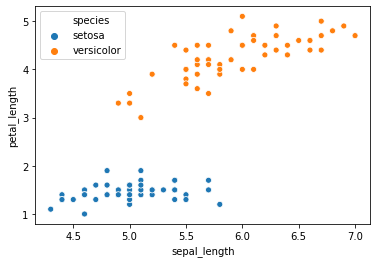

In [60]:
sns.scatterplot(df['sepal_length'],df['petal_length'],df['species'])

In [61]:
#Label Encoding for species column

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
df['species'] = encoder.fit_transform(df['species'])

In [64]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [65]:
# X any y Extraction

In [66]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [67]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [69]:
#Scaling the data

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X = scaler.fit_transform(X)

In [72]:
# Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
print(X_train.shape)
print(y_train.shape)

(80, 2)
(80,)


In [75]:
#Sigmoid Function

In [76]:
def sigmoid(z):
        
         return 1/(1+np.exp(-z))

In [77]:
#GradientDescent class 

In [78]:
class GradientDescent:
    
    def __init__(self , learning_rate=0.1 , n_iterations=1000):
        
        self.weights = None
        self.bias = None
        self.lr = learning_rate
        self.epochs = n_iterations
    
    
        
    def fit(self,X,y):
        
        self.weights = np.zeros(X.shape[1])
        self.bias =0
        
        for i in range(1,500):
    
            #y_cap calculation
            y_cap = sigmoid(np.dot(X_train,self.weights) + self.bias)

            #updating weights
            w_derivative = - ((np.dot((y_train - y_cap),X_train))/X_train.shape[0])   #3
            b_derivative = - ((np.mean(y_train - y_cap)))

            #calculating loss
            loss = np.mean(- y_train * np.log(y_cap) - (1 - y_train) * np.log(1 - y_cap))

            y_cap = sigmoid(np.dot(X_train,self.weights) + self.bias)
            loss = np.mean(- y_train * np.log(y_cap) - (1 - y_train) * np.log(1 - y_cap))


            print('After {} epoch the loss is'.format(i+1),loss)
        
        self.weights = self.weights - (self.lr * w_derivative)
        self.bias = self.bias - (self.lr * b_derivative)
        print(self.weights)
        print(self.bias)    


In [79]:
model = GradientDescent()

In [80]:
model.fit(X_train,y_train)

After 2 epoch the loss is 0.6931471805599453
After 3 epoch the loss is 0.6931471805599453
After 4 epoch the loss is 0.6931471805599453
After 5 epoch the loss is 0.6931471805599453
After 6 epoch the loss is 0.6931471805599453
After 7 epoch the loss is 0.6931471805599453
After 8 epoch the loss is 0.6931471805599453
After 9 epoch the loss is 0.6931471805599453
After 10 epoch the loss is 0.6931471805599453
After 11 epoch the loss is 0.6931471805599453
After 12 epoch the loss is 0.6931471805599453
After 13 epoch the loss is 0.6931471805599453
After 14 epoch the loss is 0.6931471805599453
After 15 epoch the loss is 0.6931471805599453
After 16 epoch the loss is 0.6931471805599453
After 17 epoch the loss is 0.6931471805599453
After 18 epoch the loss is 0.6931471805599453
After 19 epoch the loss is 0.6931471805599453
After 20 epoch the loss is 0.6931471805599453
After 21 epoch the loss is 0.6931471805599453
After 22 epoch the loss is 0.6931471805599453
After 23 epoch the loss is 0.6931471805599

In [82]:
print(model.weights)
print(model.bias)

[0.03465252 0.04814417]
0.0
